In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import math as mt
from scipy import linalg as la

1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [21]:
N=5000

#Generate dataset 

np.random.seed(1234)
x1= np.random.normal( 0, 1, N)
x2= x1 + np.random.normal( 0, 3, N)
x3= 2*x1+x2
dataset = pd.DataFrame({'x1' : x1,'x2' : x2,'x3' : x3,})

#Find the eigenvectors and eigenvalues of the covariance matrix of the dataset

covar=np.cov(dataset,rowvar=False)
val, vec = la.eig(covar)
print ("Eigenvalues eigendecomposition :\n", np.real_if_close(val))
print ("Eigenvectors eigendecomposition :")
for i1 in range(len(val)):
    print( vec[:,i1])
    
#Find the eigenvectors and eigenvalues using SVD. Check that they are two procedure yields to same result
U, D, Vt = la.svd(dataset)
val_svd = D**2/(N-1)
print ("Eigenvalues with SVD: \n",val_svd)
print ("Eigenvectors with SVD:")
for j in range(len(val_svd)):
    print (Vt[j,:])
       

print ("First component has a variability of : {0:.4%}".format(np.diag(val_svd)[0,0]/np.diag(val_svd).trace()))
print ("Second component has a variability of : {0:.4%}".format(np.diag(val_svd)[1,1]/np.diag(val_svd).trace()))
print('Third component has a variability of : ',np.diag(val_svd)[2,2]/np.diag(val_svd).trace())


Eigenvalues eigendecomposition :
 [2.73805576e+01 1.64264485e-15 1.93386937e+00]
Eigenvectors eigendecomposition :
[-0.11545331 -0.5773712  -0.80827782]
[-0.81649658 -0.40824829  0.40824829]
[ 0.56568884 -0.70708969  0.42428799]
Eigenvalues with SVD: 
 [2.73924068e+01 1.93429785e+00 3.53618814e-32]
Eigenvectors with SVD:
[-0.11550339 -0.5773086  -0.80831538]
[-0.56567862  0.7071408  -0.42421644]
[ 0.81649658  0.40824829 -0.40824829]
First component has a variability of : 93.4043%
Second component has a variability of : 6.5957%
Third component has a variability of :  1.20579116368e-33


Text(0, 0.5, 'x3')

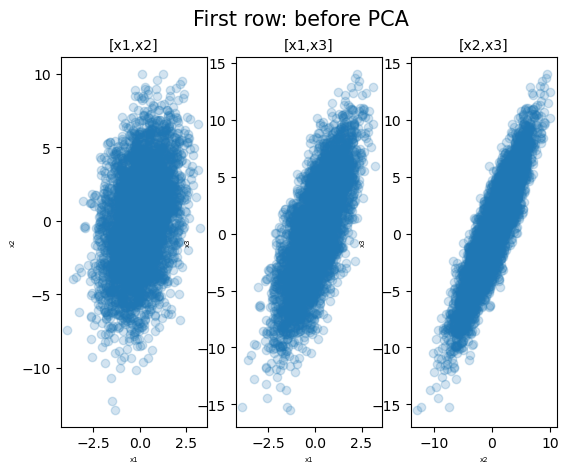

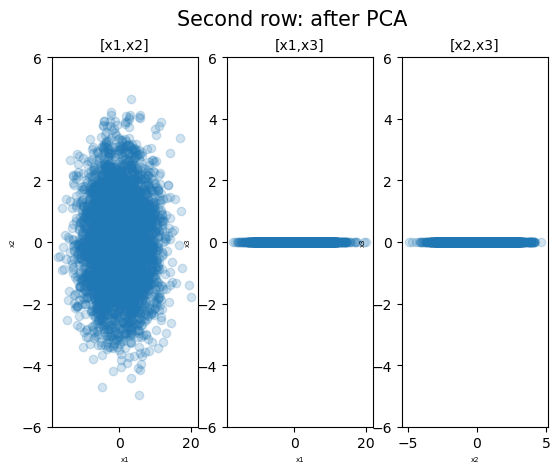

In [20]:
#Plot correlations

dataset_PCA= np.dot(Vt,dataset.T)

fig, ax = plt.subplots(nrows=1, ncols=3)
fig.suptitle('First row: before PCA', fontsize = 15)


ax[0].scatter(dataset[['x1']],dataset[['x2']],alpha=0.2)
ax[0].set_title("[x1,x2]",fontsize=10)
ax[0].set_xlabel("x1",fontsize=5)
ax[0].set_ylabel("x2",fontsize=5)
   
ax[1].scatter(dataset[['x1']], dataset[['x3']],alpha=0.2)
ax[1].set_title("[x1,x3]",fontsize=10)
ax[1].set_xlabel("x1",fontsize=5)
ax[1].set_ylabel("x3",fontsize=5)
     
ax[2].scatter(dataset[['x2']], dataset[['x3']],alpha=0.2)
ax[2].set_title("[x2,x3]",fontsize=10)
ax[2].set_xlabel("x2",fontsize=5)
ax[2].set_ylabel("x3",fontsize=5)

fig, ax1 = plt.subplots(nrows=1, ncols=3)
fig.suptitle('Second row: after PCA', fontsize = 15)
plt.setp(ax1, ylim=(-6,6))


ax1[0].scatter(dataset_PCA[0,:], dataset_PCA[1,:], alpha=0.2)
ax1[0].set_title("[x1,x2]",fontsize=10)
ax1[0].set_xlabel("x1",fontsize=5)
ax1[0].set_ylabel("x2",fontsize=5)

ax1[1].scatter(dataset_PCA[0,:], dataset_PCA[2,:], alpha=0.2)
ax1[1].set_title("[x1,x3]",fontsize=10)
ax1[1].set_xlabel("x1",fontsize=5)
ax1[1].set_ylabel("x3",fontsize=5)

ax1[2].scatter(dataset_PCA[1,:], dataset_PCA[2,:], alpha=0.2)
ax1[2].set_title("[x2,x3]",fontsize=10)
ax1[2].set_xlabel("x2",fontsize=5)
ax1[2].set_ylabel("x3",fontsize=5)

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [26]:
sigma = mt.sqrt(10)

for i in range(10):
    dataset["noise"+str(i)]= np.random.normal(0,sigma/np.random.randint(low=20, high=30),N)

dataset


,x1,x2,x3,noise0,noise1,noise2,noise3,noise4,noise5,noise6,noise7,noise8,noise9
0,0.471435,4.604570,5.547440,-0.160479,-0.089310,0.039956,0.017169,-0.005027,-0.228557,0.043339,0.035347,0.156171,-0.114647
1,-1.190976,-1.134473,-3.516424,0.023736,0.254555,0.139767,0.132785,0.159206,-0.040764,-0.140810,-0.113461,0.384151,0.017127
2,1.432707,-0.969730,1.895684,-0.105538,0.107428,0.289491,0.089105,-0.029749,-0.184245,0.134400,-0.161342,-0.070263,0.070179
3,-0.312652,3.635348,3.010044,-0.057815,0.129271,-0.100796,-0.326982,-0.351403,-0.069271,0.018420,0.101050,-0.020743,-0.115700
4,-0.720589,3.415868,1.974690,-0.037387,-0.142643,0.132224,-0.134668,-0.133570,0.015493,-0.098867,0.079656,-0.140975,-0.010822
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.592877,-3.737175,-4.922930,0.013999,0.037139,-0.061959,0.184995,0.263764,0.192529,-0.042212,-0.194241,-0.183316,0.027146
4996,0.708934,-1.627420,-0.209552,-0.241861,-0.052032,0.078145,-0.052257,0.199497,-0.026624,-0.076861,0.149335,0.040756,0.150899
4997,1.608824,-1.548558,1.669089,-0.143412,0.175135,0.248396,0.030911,-0.150784,-0.204908,-0.172353,0.072157,-0.019737,0.097590
4998,1.995282,0.502203,4.492766,0.080017,0.248911,-0.036430,-0.285418,0.026283,0.175878,-0.126655,-0.138446,-0.103099,-0.147429


In [30]:
#Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
covar=np.cov(dataset,rowvar=False)
val, vec = la.eig(covar)
print ("Eigenvalues eigendecomposition :\n", np.real_if_close(val))
print ("Eigenvectors eigendecomposition :")
for i1 in range(len(val)):
    print( vec[:,i1])
    
#Find the eigenvectors and eigenvalues using SVD. Check that they are two procedure yields to same result
U, D, Vt = la.svd(dataset)
val_svd = D**2/(N-1)
print ("Eigenvalues with SVD: \n",val_svd)
print ("Eigenvectors with SVD:")
for j in range(len(val_svd)):
    print (Vt[j,:])
       
for i in range(13):
    print("Component",i,"has a variability of : ",np.diag(val_svd)[i,i]/np.diag(val_svd).trace())



Eigenvalues eigendecomposition :
 [2.73806042e+01 1.93392011e+00 9.99742329e-17 1.19764689e-02
 1.21570605e-02 1.85921681e-02 2.01426198e-02 2.17352476e-02
 2.28347831e-02 2.41927689e-02 2.63227099e-02 2.53348071e-02
 2.55882733e-02]
Eigenvectors eigendecomposition :
[ 1.15453044e-01  5.77370916e-01  8.08277005e-01 -2.82249345e-04
  1.88116352e-04  1.16558500e-04  4.73706782e-05  9.03324390e-04
 -7.26845894e-04 -2.95377268e-04 -1.80859244e-04  2.50233741e-04
  2.12890021e-04]
[ 5.65681833e-01 -7.07077865e-01  4.24285800e-01  6.22507874e-05
  1.85970766e-03  6.35467459e-04 -5.36095680e-04 -4.05486937e-04
  3.76492732e-03  2.42694160e-03  7.60204184e-04 -1.19667653e-03
 -3.50966074e-04]
[-8.16496581e-01 -4.08248290e-01  4.08248290e-01 -1.14077971e-17
  1.34771027e-16 -1.21921673e-17  1.87729990e-18 -4.88907781e-17
 -2.37369306e-16  2.81548749e-16 -5.75126643e-17 -1.75129592e-16
 -2.01102181e-16]
[-1.22459270e-04  1.03400690e-04 -1.41517850e-04 -7.91848697e-01
 -1.62780879e-02  2.14352924

Text(0, 0.5, 'x3')

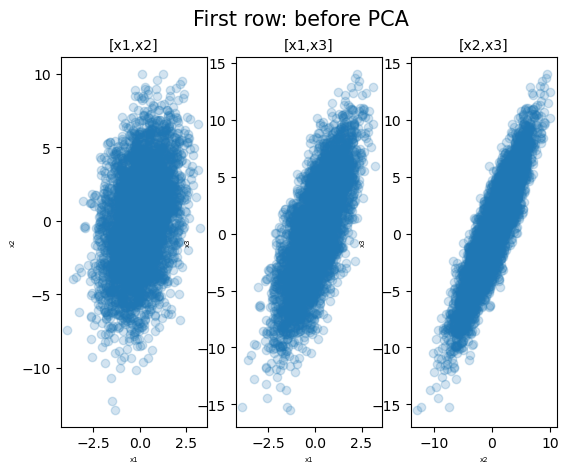

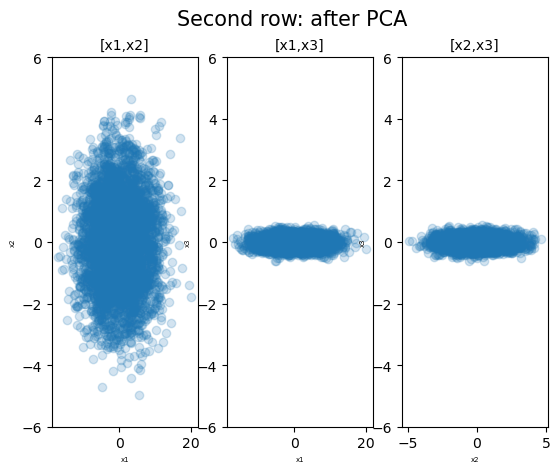

In [29]:
#PCA

dataset_PCA= np.dot(Vt,dataset.T)


#Plot correlations
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.suptitle('First row: before PCA', fontsize = 15)

ax[0].scatter(dataset[['x1']],dataset[['x2']],alpha=0.2)
ax[0].set_title("[x1,x2]",fontsize=10)
ax[0].set_xlabel("x1",fontsize=5)
ax[0].set_ylabel("x2",fontsize=5)
   
ax[1].scatter(dataset[['x1']], dataset[['x3']],alpha=0.2)
ax[1].set_title("[x1,x3]",fontsize=10)
ax[1].set_xlabel("x1",fontsize=5)
ax[1].set_ylabel("x3",fontsize=5)
     
ax[2].scatter(dataset[['x2']], dataset[['x3']],alpha=0.2)
ax[2].set_title("[x2,x3]",fontsize=10)
ax[2].set_xlabel("x2",fontsize=5)
ax[2].set_ylabel("x3",fontsize=5)

fig, ax1 = plt.subplots(nrows=1, ncols=3)
fig.suptitle('Second row: after PCA', fontsize = 15)
plt.setp(ax1, ylim=(-6,6))

ax1[0].scatter(dataset_PCA[0,:], dataset_PCA[1,:], alpha=0.2)
ax1[0].set_title("[x1,x2]",fontsize=10)
ax1[0].set_xlabel("x1",fontsize=5)
ax1[0].set_ylabel("x2",fontsize=5)

ax1[1].scatter(dataset_PCA[0,:], dataset_PCA[2,:], alpha=0.2)
ax1[1].set_title("[x1,x3]",fontsize=10)
ax1[1].set_xlabel("x1",fontsize=5)
ax1[1].set_ylabel("x3",fontsize=5)

ax1[2].scatter(dataset_PCA[1,:], dataset_PCA[2,:], alpha=0.2)
ax1[2].set_title("[x2,x3]",fontsize=10)
ax1[2].set_xlabel("x2",fontsize=5)
ax1[2].set_ylabel("x3",fontsize=5)

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 